The purpose of this notebook will be to do some basic data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os.path

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('all_tracks_capstone3.csv', index_col=0)

In [3]:
#Some Artists had characters in their name that needed replaced so that the code could run without throwing errors.
#we will replace $ with z
df.loc[df['artists'].str.find('$') != -1,['artists']] = df['artists'].str.replace('$', 'z')

I want to be able to differentiate between feature artists for my analysis, this theoretically could have been accomplished in Data Wrangling, but I didn't think it would be important for my plots legends until now.

In [4]:
#grabbing every artist and placing them in a list
artistList = []
for i,x in df.loc[:,['artists']].iteritems():
    for row in x.str.split(','):
        for artist in row:
            artist = artist.strip()
            artistList.append(artist)

            
#preparation for creating a dataframe
counts = []
unique_artists = np.unique(np.array(artistList))
for artist in unique_artists:
    counts.append(artistList.count(artist))

#creating a small dataframe to get the number of tracks each artist is included in. My original 21 artists will have the highest
#number of tracks.
countsdf = pd.DataFrame(list(zip(unique_artists,counts)), columns =['Feature_Artist', 'Count'])
countsdf = countsdf.loc[countsdf['Count'] >= 9, :]

#with my filtered dataframe I can now determine who the featured artist is. I will iterate through each row, checking if
#the artist in question is in the artistList for this row. if so, then the artist will be assigned to the feature_artist column
df['feature_artist'] = np.nan
for i,x in df.loc[:,['artists']].iteritems():
    for row in x:
        for p, y in countsdf.loc[:,['Feature_Artist']].iteritems():
            for fRow in y:
                if row.find(fRow) != -1:
                    df.loc[df['artists'] == row, ['feature_artist']] = fRow

HEAT MAP

<AxesSubplot:>

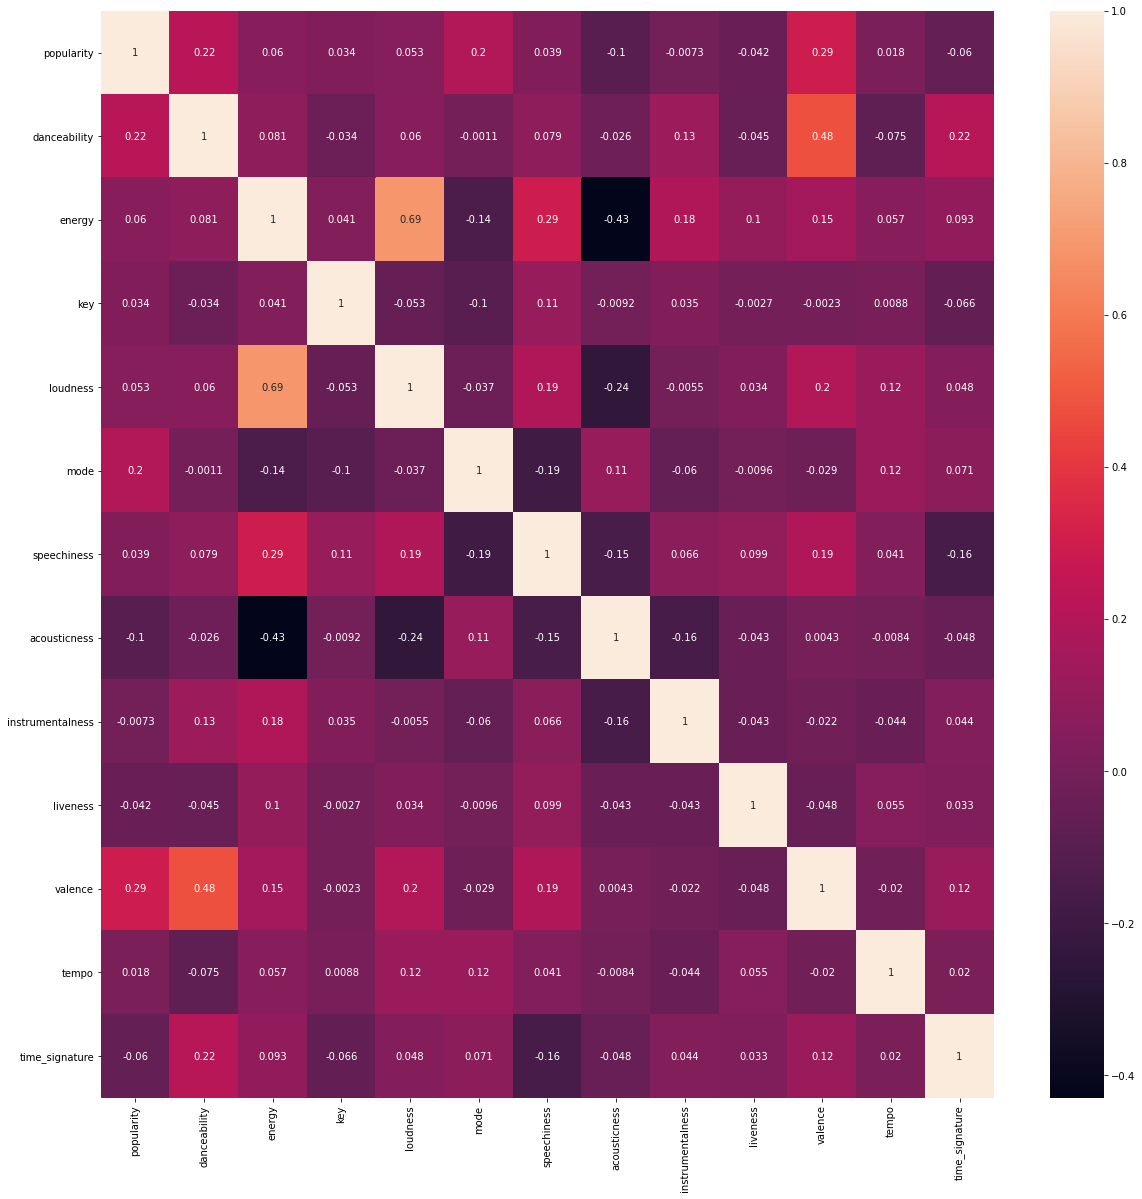

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

BAR GRAPH - DISPLAYS POPULARITY OF TRACKS FOR EACH ARTIST

<AxesSubplot:xlabel='feature_artist', ylabel='popularity'>

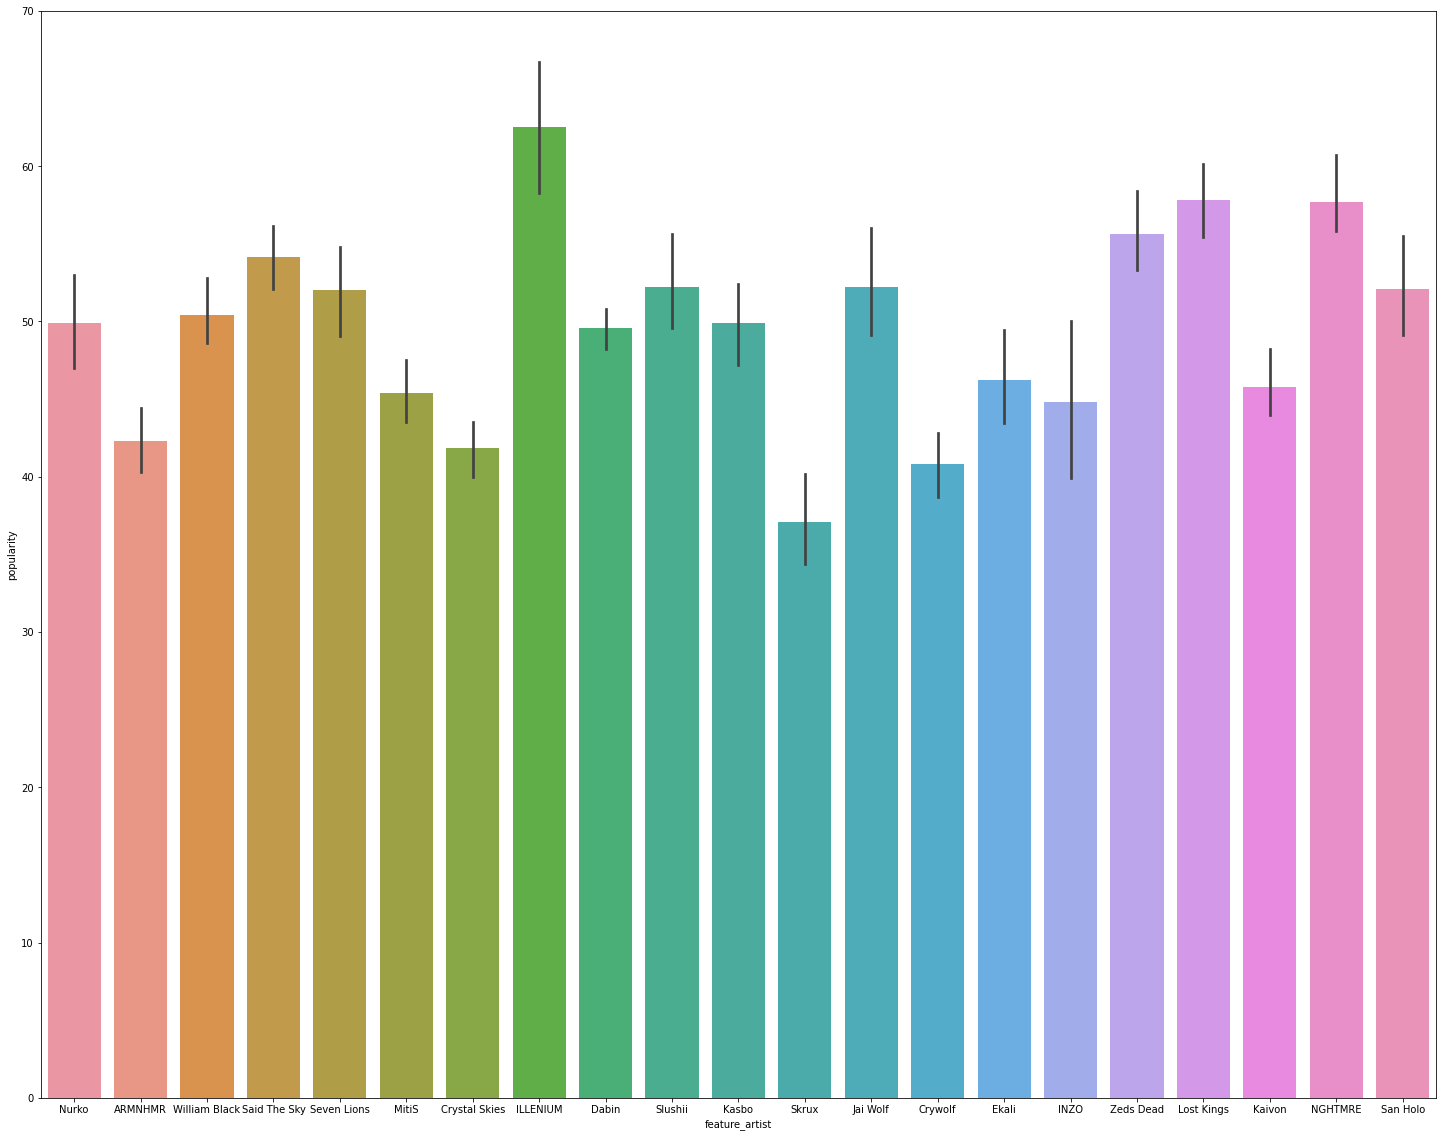

In [7]:
plt.figure(figsize=(25,20))
sns.barplot(x="feature_artist", y="popularity", data=df)

BOX PLOTS FOR EACH FEATURE

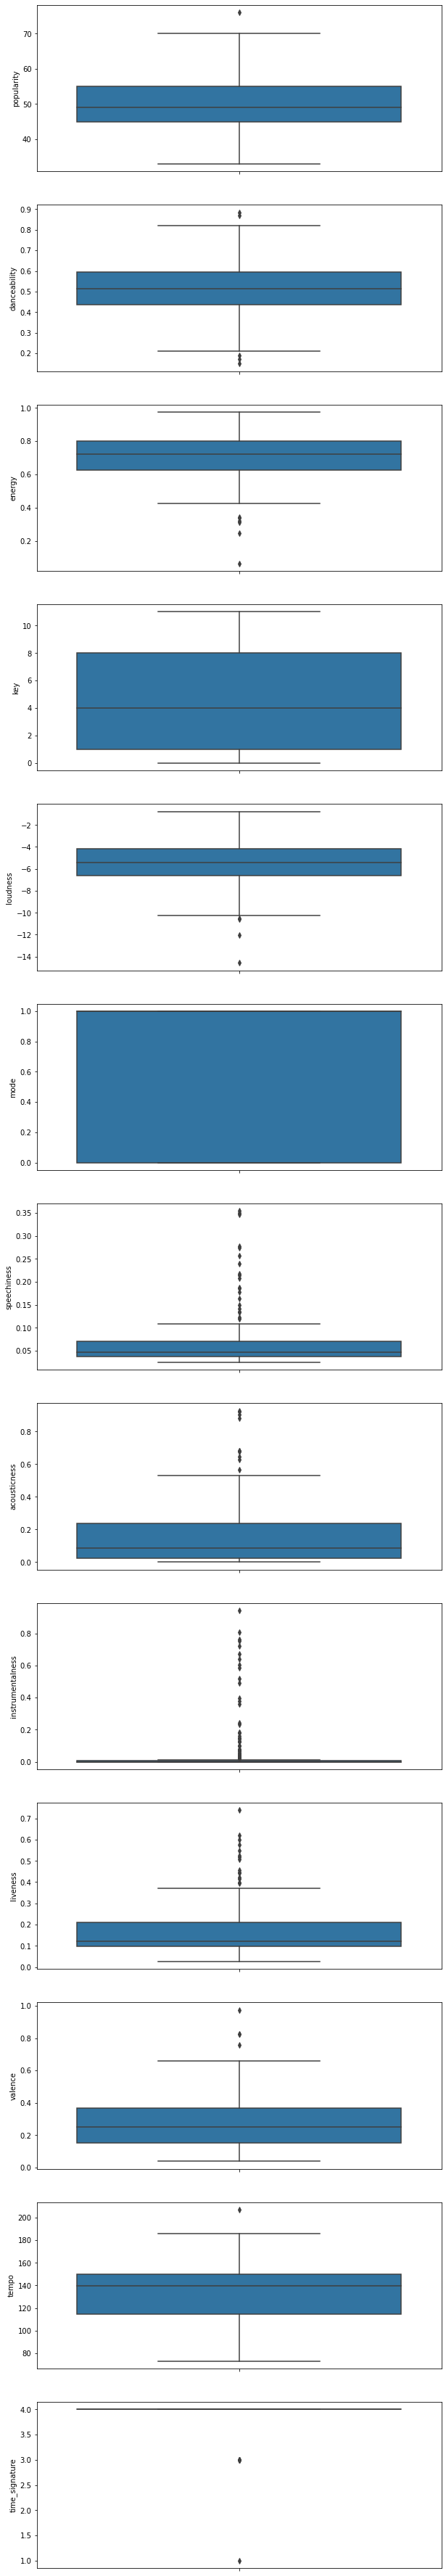

In [8]:
def my_boxplot(cols):
    plt.figure(figsize=(10,len(cols) *5))
    for i in range(len(cols)):
        plt.subplot(len(cols),1,(i+1))
        sns.boxplot(y=cols[i],data=df)



numFeatures = list(df.columns)
numFeatures
for x in ['artists','id','name','feature_artist']:
    numFeatures.remove(x)
my_boxplot(numFeatures)

In [9]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,49.926108,0.516118,0.704855,4.778325,-5.515015,0.650246,0.066450,0.159540,0.056921,0.174482,0.277636,131.895956,3.955665
std,7.919112,0.124206,0.145328,3.624056,1.946591,0.478071,0.056856,0.191306,0.163990,0.123614,0.163063,26.776472,0.268853
min,33.000000,0.150000,0.065600,0.000000,-14.564000,0.000000,0.025100,0.000208,0.000000,0.026100,0.038700,73.041000,1.000000
25%,45.000000,0.438000,0.625000,1.000000,-6.631000,0.000000,0.037350,0.023700,0.000000,0.098550,0.150000,114.500500,4.000000
50%,49.000000,0.515000,0.721000,4.000000,-5.416000,1.000000,0.046600,0.084900,0.000052,0.122000,0.251000,139.879000,4.000000
75%,55.000000,0.596500,0.799000,8.000000,-4.191500,1.000000,0.070250,0.235000,0.007915,0.210500,0.365500,149.918500,4.000000
max,76.000000,0.885000,0.975000,11.000000,-0.770000,1.000000,0.354000,0.927000,0.943000,0.739000,0.975000,207.147000,4.000000


In [10]:
df.to_csv('capstone3_data.csv')

Based on the analysis above, I think that the best models to implement later in the project will be regression. This way we can input values for each feature that will lead to the best output of popularity.